<a href="https://colab.research.google.com/github/samantha-olinsky/MA322-Python/blob/main/MLR/MLR_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages we need for MLR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from scipy import stats
import seaborn as sns

# load dataset into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/insurance.csv')

### Lab Question 1:

In [ ]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Target Feature: `charges`

It is a numerical feature.

Regression is used to predict numerical features.

### Lab Question 2:

In [ ]:
# to look at the datatype of each feature
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# to determine the categories of the categorical variables
print(pd.crosstab(index=df['sex'], columns="count"), "\n")
print(pd.crosstab(index=df['smoker'], columns="count"), "\n")
print(pd.crosstab(index=df['region'], columns="count"))

# "\n" adds a line break, so that we can distinguish our freq tables

col_0   count
sex          
female    662
male      676 

col_0   count
smoker       
no       1064
yes       274 

col_0      count
region          
northeast    324
northwest    325
southeast    364
southwest    325


Independent Variables:

* age, numerical
* sex, categorical with categories "female" "male"
* bmi, numerical
* children, numerical
* smoker, categorical with categories "no" "yes"
* region, categorical with categories "northeast" "northwest" "southeast" "southwest"

### Lab Question 3:

There are 1338 examples (rows).

Each represents a health insurance policy-holder’s characteristics, attributes,
and charges for the past calendar year.

### Lab Question 4:



               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


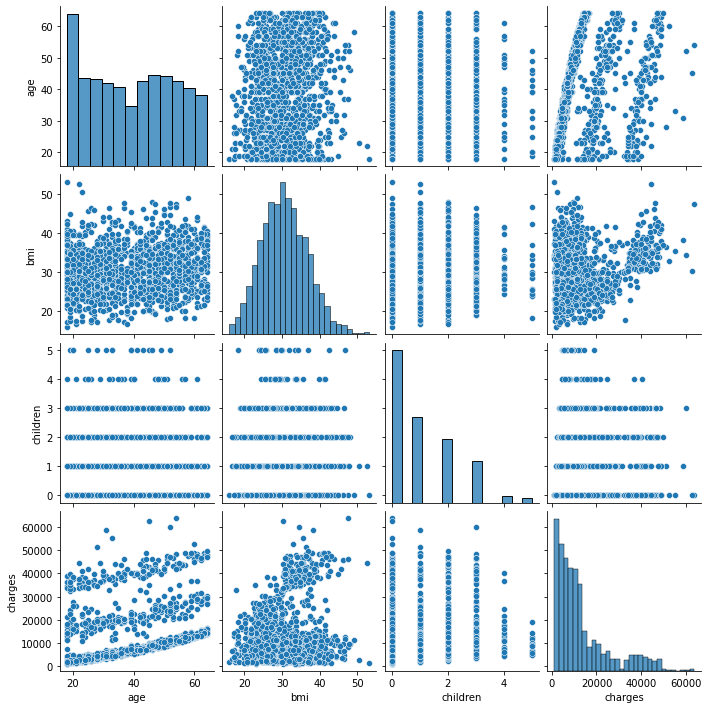

In [ ]:
# scatterplot matrix
print(sns.pairplot(df))

### Lab Question 5:

In [ ]:
# correlation matrix
print(df.corr()) 

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


None of the correlation coefficients seem that high, but the correlation between `age` and `charges` is the highest, which is consistent with our interpetation of the scatterplot matrix.

### Lab Question 6:

In [ ]:
# MLR model
X = df[['age', 'bmi', 'children']]

# and lets set our dependent var/target feature
Y = df['charges']

# fit the model
model = linear_model.LinearRegression().fit(X,Y)

print('Intercept:',model.intercept_)
print("Coef's:", model.coef_)

Intercept: -6916.243347787033
Coef's: [239.99447429 332.0833645  542.86465225]


In [ ]:
# calculate R squared
predicts = model.predict(X)
metrics.r2_score(Y, predicts)

0.12009819576246927

In [ ]:
df2 = pd.get_dummies(df, drop_first=True)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB
None


In [ ]:
# MLR model2
X1 = df2[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]

# and lets set our dependent var/target feature
Y1 = df2['charges']

# fit the model
model2 = linear_model.LinearRegression().fit(X1,Y1)

print('Intercept:',model2.intercept_)
print("Coef's:", model2.coef_)

Intercept: -11938.538576167142
Coef's: [  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]


In [ ]:
# calculate R squared
predicts2 = model2.predict(X1)
metrics.r2_score(Y1, predicts2)

0.7509130345985207

In [ ]:
# MLR model3
X2 = df2[['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]

# and lets set our dependent var/target feature
Y2 = df2['charges']

# fit the model
model3 = linear_model.LinearRegression().fit(X2,Y2)

# calculate R squared
predicts3 = model3.predict(X2)
metrics.r2_score(Y2, predicts3)

0.7508838801843356